In [1]:
import random
import pandas as pd 
import matplotlib.pyplot as plt 
import functools
import numpy as np

In [2]:
# generating the dataset
def generate_data():
    x_data = []
    y_data = []
    
    m = 5
    c = 10
    for i in range(0, 100):
        x = random.randint(1, 100)       
        x_data.append(x) 
        
        y = m*x + c + random.randint(-20,20)
        y_data.append(y)

    data = pd.DataFrame({'x_data' : x_data,'y_data' : y_data})
    return data


df = generate_data()



In [3]:
df.head()

,x_data,y_data
0,13,88
1,49,273
2,60,305
3,47,257
4,7,58


In [4]:
df['x_data'].max()

99

In [5]:
df['y_data'].max()

508

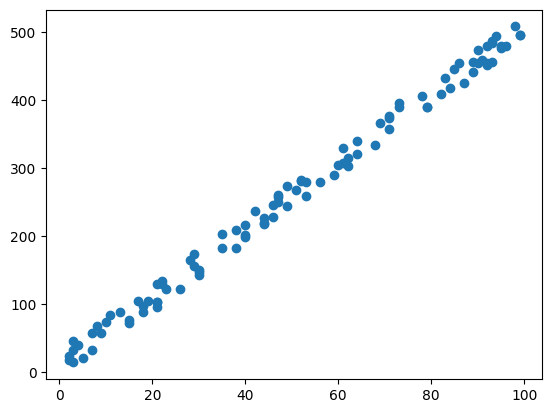

In [6]:
plt.scatter(df['x_data'], df['y_data'])

In [8]:

# declaring Linear_Regression
class Linear_Regression: 

    def __init__(self, m = None , c = None, loss = 0): 
        self.m = random.uniform(0,1)
        self.c = random.uniform(0,1)
        self.loss = loss 


    def fit(self, X_train , y_train, alpha = 0.001, epochs = 10):
        # Normalizing
        X_train = X_train / X_train.max()
        y_train = y_train / y_train.max()
        
        data_size = len(X_train)
        # itretion
        for epoch in range(epochs):
            self.loss = 0
            y_pred_list = []
            
            # forward propgation
            for i in range(data_size): 
                X = X_train.iloc[i]
                y_pred = self.m * X + self.c 
                y_pred_list.append(y_pred)
                error = (y_train.iloc[i] - y_pred)**2
                self.loss+=error
                
            self.loss = self.loss / data_size
            # printing loss
            if epoch == 0:
                print(f"Epoch {epoch + 1}, Loss: {self.loss}")
            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch + 1}, Loss: {self.loss}")
    
            # gradient for m & c
            m_sum = 0
            c_sum = 0
            
            for i in range(data_size): 
                X_actual = X_train.iloc[i]
                y_actual = y_train.iloc[i]
                y_pred = y_pred_list[i]
                
                m_sum += X_actual*(y_actual - y_pred)
                c_sum += (y_actual - y_pred)
                
            # gradients    
            tangent_gradient_m = - (2/data_size) * m_sum            
            tangent_gradient_c = - (2/data_size) * c_sum
    
            # updating parameters 
            self.m = self.m - alpha * tangent_gradient_m
            self.c = self.c - alpha * tangent_gradient_c
            
        return "Slope: ",self.m , "Intercept: ",self.c
            
model = Linear_Regression()       
model.fit(df['x_data'], df['y_data'],alpha=0.02, epochs=1000)      


Epoch 1, Loss: 0.06371313171999074
Epoch 100, Loss: 0.02105069767388983
Epoch 200, Loss: 0.011985863383237618
Epoch 300, Loss: 0.006931493909413706
Epoch 400, Loss: 0.004113028285327771
Epoch 500, Loss: 0.002541368645116425
Epoch 600, Loss: 0.0016649648303738206
Epoch 700, Loss: 0.0011762561896199628
Epoch 800, Loss: 0.0009037378236226276
Epoch 900, Loss: 0.0007517735373122902
Epoch 1000, Loss: 0.0006670337648962266


('Slope: ', 0.9312728632123072, 'Intercept: ', 0.04197023886998502)